<a href="https://colab.research.google.com/github/edithcarollaine/desafioPython/blob/main/Tratamento_de_dados%2C_kNN_e_arvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratamento de dados, árvore de decisão e aplicação com machine learning de classificação kNN de aprendizado supervisionado**

#**Importando bibliotecas**

In [ ]:
#Importando bibliotecas

import statistics as sts
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

# **Tratamento de dados**


Importando dataset e criando DataFrame

In [ ]:
data = pd.read_csv("breast-cancer-wisconsin.data", sep=",")
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data.head()

In [ ]:
def group(coluna):
    grupo = data.groupby([coluna]).size()
    return grupo

def descrever(coluna):
    result = data[coluna].describe()
    return result

In [ ]:
# Sample code pode ser removido ou pode ser mantido, pois ele não interefere no resultado que queremos.
# mas caso queira retirar a coluna, utilize o código abaixo que está comentado.
#data = data.drop(columns=["Sample code"])
#data.head()

In [ ]:
# Verificando dados ausentes
data.isin(["?"]).sum()

In [ ]:
# Verificando dados NaN. Neste dataset não possui, contudo a verificação é importante para um melhor tratamento dos dataset.

data.isnull().sum()

In [ ]:
# Usando esssa função data.info(), podemos verificar que a coluna Bare Nuclei é do tipo object, logo para calcular mediana
# devemos fazer a conversão para o tipo int64.
data.info()

# Mudando o tipo da coluna
data['Bare Nuclei'] = data['Bare Nuclei'].astype(int)

# Mudando os dados ausentes (?) para 0, lembrando que também poderiamos simplesmente apaga-los do nosso dataset.
data.loc[data['Bare Nuclei'] == '?', 'Bare Nuclei'] = 0

# Cálculo da mediana e aplicação aos dados vazios substituidos
mediana = sts.median(data['Bare Nuclei'])
data.loc[data['Bare Nuclei'] == 0, 'Bare Nuclei']= mediana

In [ ]:
# Verificando se ainda existem valores vazios
data.isin(['?']).sum()

# **Utilizando os dataset já tratado, vamos iniciar os testes de previsors e class**

In [ ]:
#Separando as colunas de previsores. 0 até 8.
previsors = data.iloc[:,0:8].values

#Separando a coluna 9.
classes = data.iloc[:,9].values

In [ ]:
# Essa função abaixo fará os testes e os treinamentos

XTraining, XTest, YTraining, YTest = train_test_split(previsors, classes, test_size = 0.3, random_state = 0)
#XTraining, XTest, YTraining, YTest

# **Árvore de decisão**

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(XTraining,YTraining)

DecisionTreeClassifier()

In [ ]:
# Previsão da árvore
previsao = tree.predict(XTest)
previsao

In [ ]:
#Taxa de precisão
precisao = accuracy_score(YTest,previsao)
precisao
print(f'Taxa de precisão: {precisao:.2%}')

Taxa de precisão: 94.76%


# **Modelo kNN**

In [ ]:
# Classificação por kNN

modelo = KNeighborsClassifier(n_neighbors = 3)
modelo.fit(XTraining,YTraining)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fazendo previsão no conjunto de testes

pred = modelo.predict(XTest)
pred

array([4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2])

In [ ]:
# Taxa de erro para diferentes valores de k

rmse_valor = [] # para armazenar valores rmse para diferentes K
for K in range(20):
    K = K+1
    modelo = neighbors.KNeighborsRegressor(n_neighbors = K)
    modelo.fit(XTraining, YTraining)  # ajustando modelo
    pred = modelo.predict(XTest) #fazer previsão no conjunto de testes
    error = sqrt(mean_squared_error(YTest, pred)) #calcula rmse
    rmse_valor.append(error) #armazena valores rmse
    print('Valor RMSE para k = ' , K , 'é:', error)


Valor RMSE para k =  1 é: 0.45773770821706344
Valor RMSE para k =  2 é: 0.3779644730092272
Valor RMSE para k =  3 é: 0.3349168735213443
Valor RMSE para k =  4 é: 0.3124404705204619
Valor RMSE para k =  5 é: 0.2934199006462208
Valor RMSE para k =  6 é: 0.31539007509891537
Valor RMSE para k =  7 é: 0.32216468997014064
Valor RMSE para k =  8 é: 0.30423596731735025
Valor RMSE para k =  9 é: 0.31426968052735443
Valor RMSE para k =  10 é: 0.3147183169877773
Valor RMSE para k =  11 é: 0.32427681170567235
Valor RMSE para k =  12 é: 0.3299430767002603
Valor RMSE para k =  13 é: 0.3301339840882576
Valor RMSE para k =  14 é: 0.3344490559709274
Valor RMSE para k =  15 é: 0.33174223435207956
Valor RMSE para k =  16 é: 0.33217805753053875
Valor RMSE para k =  17 é: 0.33285515215337086
Valor RMSE para k =  18 é: 0.33623079333172284
Valor RMSE para k =  19 é: 0.34085950161570905
Valor RMSE para k =  20 é: 0.33876526498728404


<AxesSubplot:>

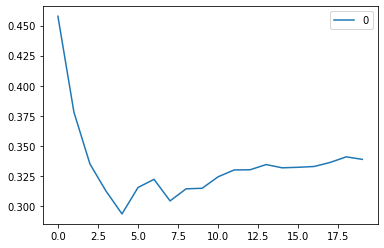

In [ ]:
curva = pd.DataFrame(rmse_valor) #Curva
curva.plot()

In [ ]:
# Acurácia

acuracia = accuracy_score(YTest, pred)
acuracia
print(f'Acurácia: {acuracia:.2%}')

Acurácia: 97.14%
